## Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

%matplotlib inline

In [3]:
# full = pd.read_csv('./data/Seasons_Stats_full_1950.csv', index_col=0)

Data from here: https://www.kaggle.com/drgilermo/nba-players-stats 

In [4]:
# full.head()

In [5]:
# full.shape

In [6]:
# data = full.query("Year > 1988")
# data.to_csv('./data/1989.csv', index=False)

In [7]:
data = pd.read_csv('./data/1989.csv')
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1989.0,Kareem Abdul-Jabbar*,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,0.739,103.0,231.0,334.0,74.0,38.0,85.0,95.0,196.0,748.0
1,1989.0,Mark Acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,0.542,59.0,87.0,146.0,19.0,19.0,6.0,23.0,94.0,137.0
2,1989.0,Michael Adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,0.819,71.0,212.0,283.0,490.0,166.0,11.0,180.0,149.0,1424.0
3,1989.0,Mark Aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,0.733,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0
4,1989.0,Mark Aguirre,SF,29.0,DAL,44.0,44.0,1529.0,17.3,0.509,...,0.730,90.0,145.0,235.0,189.0,29.0,29.0,140.0,128.0,953.0


### Scrape awards data to connect.

*Note:* Scrapped this section due to the table here being particularly unreasonable in its stupidity: https://www.basketball-reference.com//awards/all_league.html

In [8]:

# import requests
# from bs4 import BeautifulSoup

# url = 'https://www.basketball-reference.com/awards/all_league.html'
# res = requests.get(url)
# res.status_code

# ##
# # soup.find_all('td', class_=lambda x: x != 'foo')

# # soup = BeautifulSoup(res.content, 'lxml')

# # allnba_players = []
# # table = soup.find('table', {'id':'awards_all_league'})

# # for row in table.find('tbody').find_all('tr', class_=lambda x: x != 'thead'):
# #     award_dict = {}
# #     award_dict['year'] = row.find('th').find('a').text.strip()
    
# #     for entry in row.find_all('td', {'class':'left'})[1:]:
# #         award_dict['player-pos'] = entry.text.strip()
    
# #     allnba_players.append(award_dict)

### Got my awards data a different way.

In [9]:
awards = pd.read_csv('./data/allnba_awards.txt')
awards.head()

,Season,Lg,Tm,Player1,Player2,Player3,Player4,Player5
0,2017-18,NBA,1st,Anthony Davis C,LeBron James F,Kevin Durant F,Damian Lillard G,James Harden G
1,2017-18,NBA,2nd,Joel Embiid C,Giannis Antetokounmpo F,LaMarcus Aldridge F,Russell Westbrook G,DeMar DeRozan G
2,2017-18,NBA,3rd,Karl-Anthony Towns C,Jimmy Butler F,Paul George F,Stephen Curry G,Victor Oladipo G
3,2016-17,NBA,1st,Anthony Davis C,LeBron James F,Kawhi Leonard F,James Harden G,Russell Westbrook G
4,2016-17,NBA,2nd,Rudy Gobert C,Giannis Antetokounmpo F,Kevin Durant F,Stephen Curry G,Isaiah Thomas G


In [10]:
awards[awards['Season'] == '2016-17']

,Season,Lg,Tm,Player1,Player2,Player3,Player4,Player5
3,2016-17,NBA,1st,Anthony Davis C,LeBron James F,Kawhi Leonard F,James Harden G,Russell Westbrook G
4,2016-17,NBA,2nd,Rudy Gobert C,Giannis Antetokounmpo F,Kevin Durant F,Stephen Curry G,Isaiah Thomas G
5,2016-17,NBA,3rd,DeAndre Jordan C,Draymond Green F,Jimmy Butler F,John Wall G,DeMar DeRozan G


In [11]:
data[data['Player'] == 'Stephen Curry']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10913,2010.0,Stephen Curry,PG,21.0,GSW,80.0,77.0,2896.0,16.3,0.568,...,0.885,48.0,308.0,356.0,472.0,152.0,19.0,243.0,252.0,1399.0
11524,2011.0,Stephen Curry,PG,22.0,GSW,74.0,74.0,2489.0,19.4,0.595,...,0.934,52.0,234.0,286.0,432.0,109.0,20.0,226.0,233.0,1373.0
12105,2012.0,Stephen Curry,PG,23.0,GSW,26.0,23.0,732.0,21.2,0.605,...,0.809,15.0,73.0,88.0,138.0,39.0,8.0,65.0,62.0,383.0
12666,2013.0,Stephen Curry,PG,24.0,GSW,78.0,78.0,2983.0,21.3,0.589,...,0.900,59.0,255.0,314.0,539.0,126.0,12.0,240.0,198.0,1786.0
13269,2014.0,Stephen Curry,PG,25.0,GSW,78.0,78.0,2846.0,24.1,0.610,...,0.885,46.0,288.0,334.0,666.0,128.0,14.0,294.0,194.0,1873.0
13866,2015.0,Stephen Curry,PG,26.0,GSW,80.0,80.0,2613.0,28.0,0.638,...,0.914,56.0,285.0,341.0,619.0,163.0,16.0,249.0,158.0,1900.0
14498,2016.0,Stephen Curry,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,...,0.908,68.0,362.0,430.0,527.0,169.0,15.0,262.0,161.0,2375.0
15080,2017.0,Stephen Curry,PG,28.0,GSW,79.0,79.0,2638.0,24.6,0.624,...,0.898,61.0,292.0,353.0,523.0,143.0,17.0,239.0,183.0,1999.0


In [12]:
mask = (data['Year']==2017) & (data['Player'] == 'Stephen Curry')
data[mask]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
15080,2017.0,Stephen Curry,PG,28.0,GSW,79.0,79.0,2638.0,24.6,0.624,...,0.898,61.0,292.0,353.0,523.0,143.0,17.0,239.0,183.0,1999.0


#### Some Notes on next steps:
1. Make everything lowercase. everywhere.
2. Only take "TOT" from players who played more than one team during a season, dropping the individual team rows.
    - Side question, for me: has anyone ever played for more than one team in a season (trade?) and also gotten All-NBA???
3. Transform some info in the `awards` df:
    - Season-year to latest number (e.g. 2017-18 to 2018)
    - One row per year-player 
    - Separate out position: 
    - Ex: final DF should look like: `cols = ['year', 'player', 'position', 'award_team']` 
4. To join datasets, perhaps use `player-year` ID joiner?

In [13]:
# all lowercase everything
awards.columns = [col.lower() for col in awards.columns]
data.columns = [i.lower() for i in data.columns]

In [14]:
float(awards['season'][100][0:2] + awards['season'][100][-2:])

1983.0

In [15]:
awards['season'] = awards['season'].map(lambda x: float(x[0:2] + x[-2:]))

In [16]:
for i in data.loc[15080, ['year', 'player']]:
    print(i)

2017.0
Stephen Curry


In [17]:
player1 = awards[['season', 'lg', 'tm', 'player1']]
player2 = awards[['season', 'lg', 'tm', 'player2']]
player3 = awards[['season', 'lg', 'tm', 'player3']]
player4 = awards[['season', 'lg', 'tm', 'player4']]
player5 = awards[['season', 'lg', 'tm', 'player5']]

In [18]:
player1.columns = ['season', 'lg', 'tm', 'player']
player2.columns = ['season', 'lg', 'tm', 'player']
player3.columns = ['season', 'lg', 'tm', 'player']
player4.columns = ['season', 'lg', 'tm', 'player']
player5.columns = ['season', 'lg', 'tm', 'player']

In [19]:
awards_clean = pd.concat([player1, player2, player3, player4, player5])

In [20]:
awards_clean = awards_clean.reset_index(drop=True)

In [21]:
awards_clean.head()

,season,lg,tm,player
0,2018.0,NBA,1st,Anthony Davis C
1,2018.0,NBA,2nd,Joel Embiid C
2,2018.0,NBA,3rd,Karl-Anthony Towns C
3,2017.0,NBA,1st,Anthony Davis C
4,2017.0,NBA,2nd,Rudy Gobert C


In [22]:
awards_clean['position'] = awards_clean['player'].map(lambda x: x[-1:].strip())

In [23]:
awards_clean['player'] = awards_clean['player'].map(lambda x: x[:-1].strip())

In [24]:
awards_clean.head()

,season,lg,tm,player,position
0,2018.0,NBA,1st,Anthony Davis,C
1,2018.0,NBA,2nd,Joel Embiid,C
2,2018.0,NBA,3rd,Karl-Anthony Towns,C
3,2017.0,NBA,1st,Anthony Davis,C
4,2017.0,NBA,2nd,Rudy Gobert,C


In [25]:
for i in awards_clean.index[:10]:
    print(str(awards_clean.loc[i,'season']) + awards_clean.loc[i,'player'])

2018.0Anthony Davis
2018.0Joel Embiid
2018.0Karl-Anthony Towns
2017.0Anthony Davis
2017.0Rudy Gobert
2017.0DeAndre Jordan
2016.0DeAndre Jordan
2016.0DeMarcus Cousins
2016.0Andre Drummond
2015.0Marc Gasol


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15555 entries, 0 to 15554
Data columns (total 52 columns):
year      15555 non-null float64
player    15555 non-null object
pos       15555 non-null object
age       15555 non-null float64
tm        15555 non-null object
g         15555 non-null float64
gs        15555 non-null float64
mp        15555 non-null float64
per       15550 non-null float64
ts%       15482 non-null float64
3par      15473 non-null float64
ftr       15473 non-null float64
orb%      15550 non-null float64
drb%      15550 non-null float64
trb%      15550 non-null float64
ast%      15550 non-null float64
stl%      15550 non-null float64
blk%      15550 non-null float64
tov%      15496 non-null float64
usg%      15550 non-null float64
blanl     0 non-null float64
ows       15555 non-null float64
dws       15555 non-null float64
ws        15555 non-null float64
ws/48     15550 non-null float64
blank2    0 non-null float64
obpm      15555 non-null float64
dbpm      1

In [27]:
data[data.columns[data.isnull().any()]].isnull().sum().sort_values(ascending=False)

blank2    15555
blanl     15555
3p%        2773
ft%         660
2p%         109
fg%          82
3par         82
efg%         82
ftr          82
ts%          73
tov%         59
drb%          5
orb%          5
blk%          5
trb%          5
ast%          5
stl%          5
usg%          5
ws/48         5
per           5
dtype: int64

In [28]:
data[data.columns[data.isnull().any()]].isnull().sum().sort_values(ascending=False) / len(data)

blank2    1.000000
blanl     1.000000
3p%       0.178271
ft%       0.042430
2p%       0.007007
fg%       0.005272
3par      0.005272
efg%      0.005272
ftr       0.005272
ts%       0.004693
tov%      0.003793
drb%      0.000321
orb%      0.000321
blk%      0.000321
trb%      0.000321
ast%      0.000321
stl%      0.000321
usg%      0.000321
ws/48     0.000321
per       0.000321
dtype: float64

In [30]:
## drop columns that are literally useless
data = data.drop(['blank2', 'blanl'], axis=1)

In [37]:
data.columns

Index(['year', 'player', 'pos', 'age', 'tm', 'g', 'gs', 'mp', 'per', 'ts%',
       '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%', 'blk%', 'tov%',
       'usg%', 'ows', 'dws', 'ws', 'ws/48', 'obpm', 'dbpm', 'bpm', 'vorp',
       'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p', '2pa', '2p%', 'efg%',
       'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts'],
      dtype='object')

In [36]:
data[data['3p%'].isnull()].head()

,year,player,pos,age,tm,g,gs,mp,per,ts%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
28,1989.0,Walter Berry,PF,24.0,NJN,29.0,17.0,556.0,11.7,0.501,...,0.683,32.0,83.0,115.0,20.0,10.0,13.0,40.0,69.0,259.0
30,1989.0,Larry Bird*,SF,32.0,BOS,6.0,6.0,189.0,19.8,0.516,...,0.947,1.0,36.0,37.0,29.0,6.0,5.0,11.0,18.0,116.0
32,1989.0,Uwe Blab,C,26.0,DAL,37.0,0.0,208.0,10.8,0.540,...,0.800,11.0,33.0,44.0,12.0,3.0,13.0,14.0,36.0,68.0
40,1989.0,Randy Breuer,C,28.0,MIL,48.0,4.0,513.0,13.8,0.496,...,0.549,51.0,84.0,135.0,22.0,9.0,37.0,29.0,59.0,200.0
43,1989.0,Mike Brown,C,25.0,UTA,66.0,16.0,1051.0,8.4,0.491,...,0.708,92.0,166.0,258.0,41.0,25.0,17.0,77.0,133.0,300.0


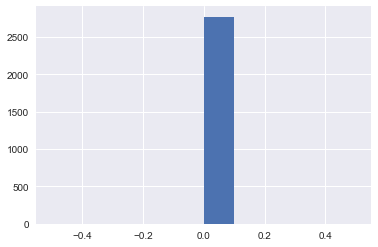

In [39]:
data[data['3p%'].isnull()]['3pa'].hist();

**JQ Notes:** A-ha! So these are blank because they literally did not attempt any 3 pointers. I'm tempted to put these as 0%. _Reasoning:_
    - 3P% as a feature may have some predictive value
        - Likely the more efficient you are, the better (with some other correlated data, e.g. 3PA/G)
    - If you have literally 0 3PA, then you are note adding value as a 3P player. So 0% is good.

In [42]:
## fillin it in.
data['3p%'].fillna(value=0, inplace=True)

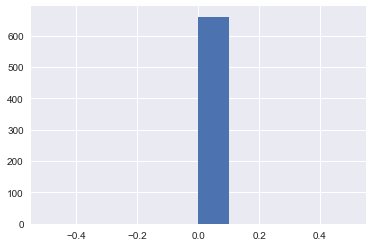

In [44]:
data[data['ft%'].isnull()]['ft'].hist();

**JQ Notes:** Same deal for FT%. Doing the same thing.

In [45]:
## fillin it in.
data['ft%'].fillna(value=0, inplace=True)

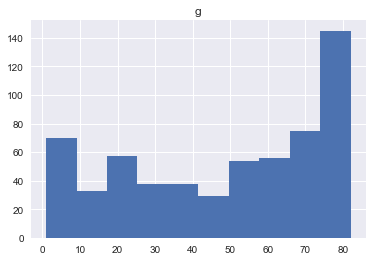

In [46]:
#checkin some stuff out.
data[data['year'] == 2017].hist(column='g');

**Let's revisit our null values**

In [52]:
data[data.columns[data.isnull().any()]].isnull().sum().sort_values(ascending=False)

2p%      109
efg%      82
fg%       82
ftr       82
3par      82
ts%       73
tov%      59
ws/48      5
usg%       5
blk%       5
stl%       5
ast%       5
trb%       5
drb%       5
orb%       5
per        5
dtype: int64

In [55]:
data.loc[data['ast%'].isnull(), ['year','player','g','ws/48', 'usg%', 'blk%', 'stl%', 'ast%', 'trb%', 'drb%', 'orb%', 'per']]

,year,player,g,ws/48,usg%,blk%,stl%,ast%,trb%,drb%,orb%,per
8662,2006.0,Josh Davis,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8979,2006.0,Alex Scales,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9942,2008.0,Stephane Lasme,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10912,2010.0,JamesOn Curry,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12800,2013.0,Damion James,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**JQ Notes:** Just gonna drop these observations. I might have a game minimum, maybe not, but I feel comfortable getting rid of these given the amt of data I have.

In [58]:
data = data.drop(data.loc[data['ast%'].isnull()].index, axis=0)

In [64]:
data[data.columns[data.isnull().any()]].isnull().sum().sort_values(ascending=False)

2p%     104
efg%     77
fg%      77
ftr      77
3par     77
ts%      68
tov%     54
dtype: int64

In [6]:
data.loc[data['2p%'].isnull(), ['year', 'player','g',
                                '2p%','2pa', 'efg%', 'fg%', 'ftr', '3par', 'ts%', 'tov%', 'tov', 'fga', '3pa', 'fta']]\
.head(20)

,year,player,g,2p%,2pa,efg%,fg%,ftr,3par,ts%,tov%,tov,fga,3pa,fta


In [76]:
## same as before. doin it.
data.fillna(0, inplace=True)

**just gonna bookmark my progress here...**

In [2]:
# data.to_csv('./data/data_v2.csv', index=False)
# awards_clean.to_csv('./data/awards_clean.csv', index=False)

In [3]:
## for when I start up again...
data = pd.read_csv('./data/data_v2.csv')
awards_clean = pd.read_csv('./data/awards_clean.csv')

In [4]:
data.isnull().sum().sum()

0

In [5]:
str(awards_clean.loc[0, 'season']) + awards_clean.loc[0, 'player']

'2018.0Anthony Davis'

In [7]:
str(data.loc[0, 'year']) + data.loc[0, 'player']

'1989.0Kareem Abdul-Jabbar*'

In [12]:
# huh, weird. Better get rid of those asterisks
data['player'] = data['player'].map(lambda x: x.replace('*',''))

In [20]:
data.head(9)

,year,player,pos,age,tm,g,gs,mp,per,ts%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1989.0,Kareem Abdul-Jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,0.739,103.0,231.0,334.0,74.0,38.0,85.0,95.0,196.0,748.0
1,1989.0,Mark Acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,0.542,59.0,87.0,146.0,19.0,19.0,6.0,23.0,94.0,137.0
2,1989.0,Michael Adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,0.819,71.0,212.0,283.0,490.0,166.0,11.0,180.0,149.0,1424.0
3,1989.0,Mark Aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,0.733,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0
4,1989.0,Mark Aguirre,SF,29.0,DAL,44.0,44.0,1529.0,17.3,0.509,...,0.730,90.0,145.0,235.0,189.0,29.0,29.0,140.0,128.0,953.0
5,1989.0,Mark Aguirre,SF,29.0,DET,36.0,32.0,1068.0,15.1,0.551,...,0.738,56.0,95.0,151.0,89.0,16.0,7.0,68.0,101.0,558.0
6,1989.0,Danny Ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,0.854,71.0,184.0,255.0,402.0,93.0,8.0,145.0,186.0,1281.0
7,1989.0,Danny Ainge,PG,29.0,BOS,45.0,28.0,1349.0,17.5,0.553,...,0.891,37.0,117.0,154.0,215.0,52.0,1.0,82.0,108.0,714.0
8,1989.0,Danny Ainge,PG,29.0,SAC,28.0,26.0,1028.0,18.6,0.554,...,0.813,34.0,67.0,101.0,187.0,41.0,7.0,63.0,78.0,567.0


In [51]:
data['year-player'] = data['year'].astype(str) + data['player']

**Notes:**
- Some players get traded mid-season. This is a problem because it gives them multiple observations in the same year:
    - e.g. Mark Aguirre, 1989 (gives DAL, DET, and TOT)
- Need a way to drop the rows that are for individual teams, and only keep the total rows

In [139]:
data_new = data.copy()

In [140]:
data_new.index

RangeIndex(start=0, stop=15550, step=1)

In [141]:
dupe_index = []
for player in data_new.index+1:
    try:
        if data.loc[player+1, 'player'] == data.loc[player, 'player'] and \
        data.loc[player+1, 'year'] == data.loc[player, 'year'] \
        and data.loc[player+1, 'tm'] != 'TOT':
            dupe_index.append(player+1)
    except:
        pass

In [142]:
data_new.shape

(15550, 51)

In [143]:
data_new.loc[dupe_index].shape

(2861, 51)

In [144]:
data_new.loc[dupe_index].head()

,year,player,pos,age,tm,g,gs,mp,per,ts%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year-player
4,1989.0,Mark Aguirre,SF,29.0,DAL,44.0,44.0,1529.0,17.3,0.509,...,90.0,145.0,235.0,189.0,29.0,29.0,140.0,128.0,953.0,1989.0Mark Aguirre
5,1989.0,Mark Aguirre,SF,29.0,DET,36.0,32.0,1068.0,15.1,0.551,...,56.0,95.0,151.0,89.0,16.0,7.0,68.0,101.0,558.0,1989.0Mark Aguirre
7,1989.0,Danny Ainge,PG,29.0,BOS,45.0,28.0,1349.0,17.5,0.553,...,37.0,117.0,154.0,215.0,52.0,1.0,82.0,108.0,714.0,1989.0Danny Ainge
8,1989.0,Danny Ainge,PG,29.0,SAC,28.0,26.0,1028.0,18.6,0.554,...,34.0,67.0,101.0,187.0,41.0,7.0,63.0,78.0,567.0,1989.0Danny Ainge
11,1989.0,Steve Alford,PG,24.0,DAL,9.0,0.0,38.0,7.2,0.295,...,0.0,3.0,3.0,9.0,1.0,0.0,1.0,3.0,7.0,1989.0Steve Alford


In [145]:
data_new.loc[dupe_index, 'tm'].unique()

array(['DAL', 'DET', 'BOS', 'SAC', 'GSW', 'NJN', 'HOU', 'MIL', 'SAS',
       'DEN', 'PHO', 'CHH', 'CHI', 'WSB', 'PHI', 'LAC', 'IND', 'ATL',
       'MIA', 'NYK', 'POR', 'UTA', 'MIN', 'CLE', 'LAL', 'SEA', 'ORL',
       'TOR', 'VAN', 'WAS', 'NOH', 'MEM', 'CHA', 'NOK', 'OKC', 'BRK',
       'NOP', 'CHO'], dtype=object)

In [146]:
data[data_new['player'].isin(['Mark Aguirre', 'Danny Ainge'])].head()

,year,player,pos,age,tm,g,gs,mp,per,ts%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year-player
3,1989.0,Mark Aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0,1989.0Mark Aguirre
4,1989.0,Mark Aguirre,SF,29.0,DAL,44.0,44.0,1529.0,17.3,0.509,...,90.0,145.0,235.0,189.0,29.0,29.0,140.0,128.0,953.0,1989.0Mark Aguirre
5,1989.0,Mark Aguirre,SF,29.0,DET,36.0,32.0,1068.0,15.1,0.551,...,56.0,95.0,151.0,89.0,16.0,7.0,68.0,101.0,558.0,1989.0Mark Aguirre
6,1989.0,Danny Ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,71.0,184.0,255.0,402.0,93.0,8.0,145.0,186.0,1281.0,1989.0Danny Ainge
7,1989.0,Danny Ainge,PG,29.0,BOS,45.0,28.0,1349.0,17.5,0.553,...,37.0,117.0,154.0,215.0,52.0,1.0,82.0,108.0,714.0,1989.0Danny Ainge


In [147]:
multiteam = []
for yp, val in enumerate(data_new['year-player'].value_counts() > 1):
    if val:
        multiteam.append((data_new['year-player'].value_counts() > 1).index[yp])

In [148]:
data_new.loc[data_new['year-player'].isin(multiteam)].head(10)

,year,player,pos,age,tm,g,gs,mp,per,ts%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year-player
3,1989.0,Mark Aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0,1989.0Mark Aguirre
4,1989.0,Mark Aguirre,SF,29.0,DAL,44.0,44.0,1529.0,17.3,0.509,...,90.0,145.0,235.0,189.0,29.0,29.0,140.0,128.0,953.0,1989.0Mark Aguirre
5,1989.0,Mark Aguirre,SF,29.0,DET,36.0,32.0,1068.0,15.1,0.551,...,56.0,95.0,151.0,89.0,16.0,7.0,68.0,101.0,558.0,1989.0Mark Aguirre
6,1989.0,Danny Ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,71.0,184.0,255.0,402.0,93.0,8.0,145.0,186.0,1281.0,1989.0Danny Ainge
7,1989.0,Danny Ainge,PG,29.0,BOS,45.0,28.0,1349.0,17.5,0.553,...,37.0,117.0,154.0,215.0,52.0,1.0,82.0,108.0,714.0,1989.0Danny Ainge
8,1989.0,Danny Ainge,PG,29.0,SAC,28.0,26.0,1028.0,18.6,0.554,...,34.0,67.0,101.0,187.0,41.0,7.0,63.0,78.0,567.0,1989.0Danny Ainge
10,1989.0,Steve Alford,PG,24.0,TOT,66.0,3.0,906.0,11.9,0.522,...,10.0,62.0,72.0,92.0,45.0,3.0,45.0,57.0,366.0,1989.0Steve Alford
11,1989.0,Steve Alford,PG,24.0,DAL,9.0,0.0,38.0,7.2,0.295,...,0.0,3.0,3.0,9.0,1.0,0.0,1.0,3.0,7.0,1989.0Steve Alford
12,1989.0,Steve Alford,PG,24.0,GSW,57.0,3.0,868.0,12.1,0.530,...,10.0,59.0,69.0,83.0,44.0,3.0,44.0,54.0,359.0,1989.0Steve Alford
27,1989.0,Walter Berry,PF,24.0,TOT,69.0,31.0,1355.0,13.2,0.540,...,86.0,181.0,267.0,77.0,29.0,48.0,89.0,183.0,609.0,1989.0Walter Berry


In [149]:
data_new.loc[(data_new['year-player'].isin(multiteam)) & (data_new['tm'] == 'TOT')].head()

,year,player,pos,age,tm,g,gs,mp,per,ts%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year-player
3,1989.0,Mark Aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0,1989.0Mark Aguirre
6,1989.0,Danny Ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,71.0,184.0,255.0,402.0,93.0,8.0,145.0,186.0,1281.0,1989.0Danny Ainge
10,1989.0,Steve Alford,PG,24.0,TOT,66.0,3.0,906.0,11.9,0.522,...,10.0,62.0,72.0,92.0,45.0,3.0,45.0,57.0,366.0,1989.0Steve Alford
27,1989.0,Walter Berry,PF,24.0,TOT,69.0,31.0,1355.0,13.2,0.540,...,86.0,181.0,267.0,77.0,29.0,48.0,89.0,183.0,609.0,1989.0Walter Berry
44,1989.0,Tony Brown,SF-SG,28.0,TOT,43.0,0.0,365.0,10.3,0.486,...,22.0,22.0,44.0,26.0,15.0,4.0,17.0,42.0,128.0,1989.0Tony Brown


In [150]:
data_new.loc[(data_new['year-player'].isin(multiteam)), 'year-player'].nunique()

1389

In [151]:
data_new.loc[(data_new['year-player'].isin(multiteam)) & (data_new['tm'] == 'TOT')].shape

(1382, 51)

In [152]:
data_new.loc[(data_new['year-player'].isin(multiteam) & (data_new['tm'] == 'TOT')), 'year-player'].nunique()

1382

In [153]:
data_new.loc[(data_new['year-player'].isin(multiteam)), 'year-player'].unique()

array(['1989.0Mark Aguirre', '1989.0Danny Ainge', '1989.0Steve Alford',
       ..., '2017.0Derrick Williams', '2017.0Lou Williams',
       '2017.0Troy Williams'], dtype=object)

In [154]:
## checking to see if they're different for some reason...
main_list = []
list_1 = list(data_new.loc[(data_new['year-player'].isin(multiteam)), 'year-player'].unique())
list_2 = list(data_new.loc[(data_new['year-player'].isin(multiteam) & (data_new['tm'] == 'TOT')), 'year-player'].unique())
main_list = np.setdiff1d(list_2,list_1)
main_list

array([], dtype='<U29')

In [155]:
data_new = data_new.drop(data_new.loc[(data_new['year-player'].isin(multiteam)) & (data_new['tm'] != 'TOT')].index)

** Let's SAVE OUR PROGRESS!! **

In [159]:
# data_new.to_csv('./data/data_v3.csv', index=False)
data_new = pd.read_csv('./data/data_v3.csv')

In [164]:
awards_clean['player'] = awards_clean['player'].map(lambda x: x.lower())
data_new['player'] = data_new['player'].map(lambda x: x.lower())

In [166]:
awards_clean['year-player'] = awards_clean['season'].astype(str) + awards_clean['player']

In [170]:
awards_clean.drop('lg', axis=1, inplace=True)

In [174]:
awards_clean.head()

,season,tm,player,position,year-player
0,2018.0,1st,anthony davis,C,2018.0anthony davis
1,2018.0,2nd,joel embiid,C,2018.0joel embiid
2,2018.0,3rd,karl-anthony towns,C,2018.0karl-anthony towns
3,2017.0,1st,anthony davis,C,2017.0anthony davis
4,2017.0,2nd,rudy gobert,C,2017.0rudy gobert


In [191]:
data_new['year-player'] = data_new['year-player'].map(lambda x: x.lower())

In [192]:
test = pd.merge(data_new, awards_clean, how='left', left_on='year-player', right_on='year-player')

In [195]:
test.shape, test[test['tm_y'].isnull()].shape

((12680, 55), (12261, 55))

In [199]:
# how many links made it to the merged data set
test.shape[0] - test[test['tm_y'].isnull()].shape[0]

419

In [202]:
# how many values SHOULD have made it...
awards_clean[awards_clean['season'] < 2018].shape[0]

945

In [211]:
awards_clean.loc[awards_clean['season'] > 1988, 'season'].value_counts().sort_index(ascending=False)

2018.0    15
2017.0    15
2016.0    15
2015.0    15
2014.0    15
2013.0    15
2012.0    15
2011.0    15
2010.0    15
2009.0    15
2008.0    15
2007.0    15
2006.0    15
2005.0    15
2004.0    15
2003.0    15
2002.0    15
2001.0    15
1999.0    15
1998.0    15
1997.0    15
1996.0    15
1995.0    15
1994.0    15
1993.0    15
1992.0    15
1991.0    15
1990.0    15
1989.0    15
Name: season, dtype: int64

In [205]:
test.loc[~test['tm_y'].isnull(), ['year','player_x', 'player_y', 'tm_x', 'tm_y']].head(10)

,year,player_x,player_y,tm_x,tm_y
17,1989.0,charles barkley,charles barkley,PHI,1st
46,1989.0,tom chambers,tom chambers,PHO,2nd
62,1989.0,terry cummings,terry cummings,MIL,3rd
89,1989.0,dale ellis,dale ellis,SEA,3rd
92,1989.0,patrick ewing,patrick ewing,NYK,2nd
152,1989.0,kevin johnson,kevin johnson,PHO,2nd
153,1989.0,magic johnson,magic johnson,LAL,1st
160,1989.0,michael jordan,michael jordan,CHI,1st
194,1989.0,karl malone,karl malone,UTA,1st
214,1989.0,chris mullin,chris mullin,GSW,2nd


In [209]:
test.loc[~test['tm_y'].isnull(), 'year'].value_counts().sort_index(ascending=False)

2017.0    15
2016.0    15
2015.0    15
2014.0    15
2013.0    15
2012.0    15
2011.0    15
2010.0    15
2009.0    15
2008.0    15
2007.0    15
2006.0    15
2005.0    15
2004.0    14
2003.0    15
2002.0    15
2001.0    15
1999.0    15
1998.0    15
1997.0    15
1996.0    15
1995.0    15
1994.0    15
1993.0    15
1992.0    15
1991.0    15
1990.0    15
1989.0    15
Name: year, dtype: int64

**Notes:** HMMMMMMMM 2004... _WHAT IS YOUR DEAL_

In [221]:
awards_clean.loc[awards_clean['season'] == 2004]

,season,tm,player,position,year-player
42,2004.0,1st,shaquille o'neal,C,2004.0shaquille o'neal
43,2004.0,2nd,ben wallace,C,2004.0ben wallace
44,2004.0,3rd,yao ming,C,2004.0yao ming
234,2004.0,1st,tim duncan,F,2004.0tim duncan
235,2004.0,2nd,jermaine o'neal,F,2004.0jermaine o'neal
236,2004.0,3rd,metta world peace,F,2004.0metta world peace
426,2004.0,1st,kevin garnett,F,2004.0kevin garnett
427,2004.0,2nd,peja stojakovic,F,2004.0peja stojakovic
428,2004.0,3rd,dirk nowitzki,F,2004.0dirk nowitzki
618,2004.0,1st,kobe bryant,G,2004.0kobe bryant


In [224]:
test.loc[((~test['tm_y'].isnull()) & (test['year']==2004)), ['year','player_x', 'player_y', 'tm_x', 'tm_y', 'position']]\
.sort_values(by='position')

,year,player_x,player_y,tm_x,tm_y,position
6470,2004.0,yao ming,yao ming,HOU,3rd,C
6491,2004.0,shaquille o'neal,shaquille o'neal,LAL,1st,C
6603,2004.0,ben wallace,ben wallace,DET,2nd,C
6312,2004.0,tim duncan,tim duncan,SAS,1st,F
6337,2004.0,kevin garnett,kevin garnett,MIN,1st,F
6489,2004.0,dirk nowitzki,dirk nowitzki,DAL,3rd,F
6490,2004.0,jermaine o'neal,jermaine o'neal,IND,2nd,F
6569,2004.0,peja stojakovic,peja stojakovic,SAC,2nd,F
6255,2004.0,kobe bryant,kobe bryant,LAL,1st,G
6269,2004.0,sam cassell,sam cassell,MIN,2nd,G


**_METTA WORLD &*@!ING PEACE_**

In [233]:
test['player_x'] = test['player_x'].apply(lambda x: x.replace('metta world', 'metta world peace'))
test['year-player'] = test['year-player'].apply(lambda x: x.replace('metta world', 'metta world peace'))

In [234]:
test[test['year-player'] == '2004.0metta world peace']

,year,player_x,pos,age,tm_x,g,gs,mp,per,ts%,...,stl,blk,tov,pf,pts,year-player,season,tm_y,player_y,position
6634,2004.0,metta world peace,SF,24.0,IND,73.0,71.0,2714.0,18.2,0.511,...,152.0,50.0,202.0,194.0,1333.0,2004.0metta world peace,NaN,NaN,NaN,NaN


In [240]:
test.loc[6634, ['season', 'tm_y', 'player_y', 'position']] = [2004.0,'3rd','metta world peace','F']

In [241]:
test[test['year-player'] == '2004.0metta world peace']

,year,player_x,pos,age,tm_x,g,gs,mp,per,ts%,...,stl,blk,tov,pf,pts,year-player,season,tm_y,player_y,position
6634,2004.0,metta world peace,SF,24.0,IND,73.0,71.0,2714.0,18.2,0.511,...,152.0,50.0,202.0,194.0,1333.0,2004.0metta world peace,2004.0,3rd,metta world peace,F


In [242]:
test.loc[~test['tm_y'].isnull(), 'year'].value_counts().sort_index(ascending=False)

2017.0    15
2016.0    15
2015.0    15
2014.0    15
2013.0    15
2012.0    15
2011.0    15
2010.0    15
2009.0    15
2008.0    15
2007.0    15
2006.0    15
2005.0    15
2004.0    15
2003.0    15
2002.0    15
2001.0    15
1999.0    15
1998.0    15
1997.0    15
1996.0    15
1995.0    15
1994.0    15
1993.0    15
1992.0    15
1991.0    15
1990.0    15
1989.0    15
Name: year, dtype: int64

** WE MADE IT, HOORAY!!! ** let's save some progress again
- START HERE IF PICKING BACK UP

In [2]:
# test.to_csv('./data/merged_v1.csv', index=False)
merged = pd.read_csv('./data/merged_v1.csv')

In [5]:
merged.head()

,year,player_x,pos,age,tm_x,g,gs,mp,per,ts%,...,stl,blk,tov,pf,pts,year-player,season,tm_y,player_y,position
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,38.0,85.0,95.0,196.0,748.0,1989.0kareem abdul-jabbar,NaN,NaN,NaN,NaN
1,1989.0,mark acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,19.0,6.0,23.0,94.0,137.0,1989.0mark acres,NaN,NaN,NaN,NaN
2,1989.0,michael adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,166.0,11.0,180.0,149.0,1424.0,1989.0michael adams,NaN,NaN,NaN,NaN
3,1989.0,mark aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,45.0,36.0,208.0,229.0,1511.0,1989.0mark aguirre,NaN,NaN,NaN,NaN
4,1989.0,danny ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,93.0,8.0,145.0,186.0,1281.0,1989.0danny ainge,NaN,NaN,NaN,NaN


**NEXT MOVES** Need to clean up some things.
1. Drop `season` and `player_y`
2. Rename `tm_y` and `position` (and `player_x` and `tm_x`)
3. Make `award_tm` ordinal
4. Deal with `NaN` in merged columns

In [4]:
## item 1.
merged.drop(['season', 'player_y'], axis=1, inplace=True)

In [5]:
## item 2.
merged.rename(columns= {
    'player_x': 'player',
    'pos':'listed_pos',
    'tm_y': 'award_tm',
    'tm_x':'tm_name',
    'position': 'award_pos',
}, inplace=True)

In [6]:
merged['award_tm'].fillna('0', inplace=True)

In [7]:
merged['award_tm'].unique()

array(['0', '1st', '2nd', '3rd'], dtype=object)

In [8]:
int(merged['award_tm'][0][0:1])

0

In [9]:
## item 3!
merged['award_tm'] = merged['award_tm'].map(lambda x: int(x[0:1]))

In [10]:
merged['award_tm'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
merged['listed_pos'].unique()

array(['C', 'PG', 'SF', 'PF', 'SG', 'SF-SG', 'PF-C', 'PF-SF', 'SG-SF',
       'PG-SG', 'SG-PG', 'SF-PF', 'C-PF', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

**Notes:** gotta figure out how to deal with `listed_pos` with weird things like `PG-SF` or something... and if I want to map them to the `G, F, C` positions in `awards_pos`

http://www.nba-allstar.com/allstargame/rosters.htm

In [23]:
merged[merged.award_tm != 0]['listed_pos'].unique()

## that's no help...

array(['PF', 'SF', 'SG', 'C', 'PG'], dtype=object)

In [27]:
merged[merged['listed_pos'].str.contains('-')]['tm_name'].unique()

## A-HA! it's only some of the mid-year traded players... they played one position for team 1 and a different one for team 2
## hmmm the smart thing to do would be to see which team they played the most games on, then use that position
## the easy way would be to just take the most recent value

array(['TOT'], dtype=object)

In [32]:
# check how many players have gotten all-nba during the same season they got traded.
merged.loc[(merged.award_tm != 0) & (merged.tm_name == 'TOT')]

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb,ast,stl,blk,tov,pf,pts,year-player,award_tm,award_pos
2270,1994.0,dominique wilkins,SF,34.0,TOT,74.0,74.0,2635.0,21.4,0.529,...,481.0,169.0,92.0,30.0,172.0,126.0,1923.0,1994.0dominique wilkins,3,F
2387,1995.0,clyde drexler,SG,32.0,TOT,76.0,75.0,2728.0,22.4,0.577,...,480.0,362.0,136.0,45.0,186.0,206.0,1653.0,1995.0clyde drexler,3,G
5168,2001.0,dikembe mutombo,C,34.0,TOT,75.0,75.0,2591.0,17.5,0.547,...,1015.0,76.0,29.0,203.0,144.0,204.0,749.0,2001.0dikembe mutombo,2,C
8510,2009.0,chauncey billups,PG,32.0,TOT,79.0,79.0,2789.0,18.8,0.592,...,239.0,506.0,93.0,18.0,177.0,161.0,1400.0,2009.0chauncey billups,3,G


**Notes:** 
- Maybe a better way would be when I merged, to include a column of total teams played for in a given season? 
    - Most will be 1.. seems unnecessary
- Gonna do the lazy way of imputing position

In [37]:
merged[merged['listed_pos'].str.contains('-')].head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb,ast,stl,blk,tov,pf,pts,year-player,award_tm,award_pos
36,1989.0,tony brown,SF-SG,28.0,TOT,43.0,0.0,365.0,10.3,0.486,...,44.0,26.0,15.0,4.0,17.0,42.0,128.0,1989.0tony brown,0,NaN
260,1989.0,jim rowinski,PF-C,28.0,TOT,9.0,0.0,15.0,17.9,0.527,...,5.0,0.0,0.0,0.0,0.0,0.0,7.0,1989.0jim rowinski,0,NaN
515,1990.0,nate johnston,PF-SF,23.0,TOT,21.0,0.0,87.0,14.1,0.428,...,23.0,1.0,3.0,8.0,6.0,11.0,46.0,1990.0nate johnston,0,NaN
717,1990.0,mike williams,PF-SF,26.0,TOT,21.0,0.0,102.0,3.5,0.363,...,23.0,2.0,3.0,7.0,3.0,30.0,15.0,1990.0mike williams,0,NaN
771,1991.0,tony brown,SG-SF,30.0,TOT,30.0,0.0,294.0,5.9,0.460,...,43.0,16.0,4.0,0.0,16.0,47.0,83.0,1991.0tony brown,0,NaN


In [44]:
merged.loc[260, 'listed_pos'][-2:].replace('-','')

'C'

In [45]:
# checking to see if lambda function works
merged['listed_pos'].map(lambda x: x[-2:].replace('-', '')).unique()

array(['C', 'PG', 'SF', 'PF', 'SG'], dtype=object)

In [47]:
# doin it!
merged['listed_pos'] = merged['listed_pos'].map(lambda x: x[-2:].replace('-', ''))

In [50]:
# last step - fill award_pos with listed_pos if NaN
merged.award_pos = merged.award_pos.fillna(merged['listed_pos'])

In [53]:
merged.isnull().sum().sum()

0

In [54]:
merged.columns

Index(['year', 'player', 'listed_pos', 'age', 'tm_name', 'g', 'gs', 'mp',
       'per', 'ts%', '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%',
       'blk%', 'tov%', 'usg%', 'ows', 'dws', 'ws', 'ws/48', 'obpm', 'dbpm',
       'bpm', 'vorp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p', '2pa',
       '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'year-player', 'award_tm', 'award_pos'],
      dtype='object')

### Saving progress....
- START HERE!

In [8]:
# merged.to_csv('./data/merged_v2.csv', index=False)
merged = pd.read_csv('./data/merged_v2.csv')

### Okay, gonna try something will all-star rosters

- Loop through east and west individually
    - Have `starter=0`
- For each one, label `starter=1` flag if it's in the first 5 entries
- Make East and West DFs
- Concat them together (axis=0)
- Merge with `merged` DF

In [223]:
# import requests
# from bs4 import BeautifulSoup

# years = [str(i)[:-2] for i in merged['year'].unique()]

# url_base = 'https://en.wikipedia.org/wiki/'
# url_end = '_NBA_All-Star_Game'
# # urls = [url_base + year + url_end for year in years]

# mega_df = pd.DataFrame()

# for year in years:
#     res = requests.get(url_base + year + url_end)
#     soup = BeautifulSoup(res.content, 'lxml')
    
#     if int(year) < 1994:
#         try:
#             table_east = soup.find_all('table', {'class': 'wikitable'})[0]
#             table_west = soup.find_all('table', {'class': 'wikitable'})[1]

#             east = []
#             for row in table_east.find_all('tr')[2:]:
#                 player = {}
#                 try:
#                     player['name'] = row.find_all('td')[0].find('a').text.lower()
#                     player['starter'] = 0
#                 except:
#                     pass
#                 east.append(player)

#             east_df = pd.DataFrame(east)
#             east_df.loc[:5, 'starter'] = 1
#             east_df['reserve'] = 1 - east_df['starter']
#             east_df['year'] = year
#             east_df.dropna(inplace=True)


#             west = []
#             for row in table_west.find_all('tr')[2:]:
#                 player = {}
#                 try:
#                     player['name'] = row.find_all('td')[0].find('a').text.lower()
#                     player['starter'] = 0
#                 except:
#                     pass
#                 west.append(player)

#             west_df = pd.DataFrame(west)
#             west_df.loc[:5, 'starter'] = 1
#             west_df['reserve'] = 1 - west_df['starter']
#             west_df['year'] = year
#             west_df.dropna(inplace=True)

#             mega_df = pd.concat([mega_df, east_df, west_df])
#             print('Pull worked for '+ str(year))

#         except:
#             pass
#             print('Pull DID NOT WORK for '+ str(year))
            
#     elif int(year) >= 1994 & int(year) != 1998 & int(year) != 1999:
#         try:
#             table_east = soup.find_all('table', {'class': 'wikitable'})[0]
#             table_west = soup.find_all('table', {'class': 'wikitable'})[1]

#             east = []
#             for row in table_east.find_all('tr')[2:]:
#                 player = {}
#                 try:
#                     player['name'] = row.find_all('td')[1].find('a').text.lower()
#                     player['starter'] = 0
#                 except:
#                     pass
#                 east.append(player)

#             east_df = pd.DataFrame(east)
#             east_df.loc[:5, 'starter'] = 1
#             east_df['reserve'] = 1 - east_df['starter']
#             east_df['year'] = year
#             east_df.dropna(inplace=True)


#             west = []
#             for row in table_west.find_all('tr')[2:]:
#                 player = {}
#                 try:
#                     player['name'] = row.find_all('td')[1].find('a').text.lower()
#                     player['starter'] = 0
#                 except:
#                     pass
#                 west.append(player)

#             west_df = pd.DataFrame(west)
#             west_df.loc[:5, 'starter'] = 1
#             west_df['reserve'] = 1 - west_df['starter']
#             west_df['year'] = year
#             west_df.dropna(inplace=True)

#             mega_df = pd.concat([mega_df, east_df, west_df])
#             print('Pull worked for '+ str(year))

#         except:
#             pass
#             print('Pull DID NOT WORK for '+ str(year))
            
#         else:
#             pass

# print(mega_df.year.unique())
# print(mega_df.shape)

In [222]:
# pd.read_csv('./data/allstar_1998.csv').dropna()

GUESS WHAT??!! NONE OF THE ABOVE FOR WIKIPEDIA FRIGGIN WORKED....

BUT BBALL-REF TO THE RESCUE. 

**Some notes on the below data pull:**
- 1999 is left out due to lockout-shortened year, so no all-star game
- Loop makes the url due to predictable URL format, then content is grabbed
- One table each for Eastern and Western conferences are pulled, with player info from each
- Then a DF is created with a "starter/reserve" flag based on if they were in the first 5 entries (based on how tables are built)
- Then they're concatenated to the end of a mega-DF, which houses all of the year data.

In [9]:
import requests
from bs4 import BeautifulSoup
years = [str(i)[:-2] for i in merged['year'].unique() if i != 1999]

url_base = 'https://www.basketball-reference.com/allstar/NBA_'
url_end = '.html'

mega_df = pd.DataFrame()

for year in years:
    res = requests.get(url_base + year + url_end)
    soup = BeautifulSoup(res.content, 'lxml')
    
    table_east = soup.find_all('table', {'id': 'East'})
    table_west = soup.find_all('table', {'id': 'West'})
    
    east = []
    for row in table_east[0].find('tbody').find_all('tr', class_=lambda x: x != 'thead rowSum'):
        player = {}
        for th in row.find_all('th', {'data-stat':'player'}):
            try:
                player['name'] = th.find('a').text.lower()
                player['starter'] = 0
            except:
                pass
            east.append(player)
            
    east_df = pd.DataFrame(east)
    east_df.loc[:5, 'starter'] = 1
    east_df['reserve'] = 1 - east_df['starter']
    east_df['year'] = year
    east_df.dropna(inplace=True)
            
    west = []
    for row in table_west[0].find('tbody').find_all('tr', class_=lambda x: x != 'thead rowSum'):
        player = {}
        for th in row.find_all('th', {'data-stat':'player'}):
            try:
                player['name'] = th.find('a').text.lower()
                player['starter'] = 0
            except:
                pass
            west.append(player)
            
            
    west_df = pd.DataFrame(west)
    west_df.loc[:5, 'starter'] = 1
    west_df['reserve'] = 1 - west_df['starter']
    west_df['year'] = year
    west_df.dropna(inplace=True)
    
    
    mega_df = pd.concat([mega_df, east_df, west_df])
    
    print('Pull worked for ' + str(year))

Pull worked for 1989
Pull worked for 1990
Pull worked for 1991
Pull worked for 1992
Pull worked for 1993
Pull worked for 1994
Pull worked for 1995
Pull worked for 1996
Pull worked for 1997
Pull worked for 1998
Pull worked for 2000
Pull worked for 2001
Pull worked for 2002
Pull worked for 2003
Pull worked for 2004
Pull worked for 2005
Pull worked for 2006
Pull worked for 2007
Pull worked for 2008
Pull worked for 2009
Pull worked for 2010
Pull worked for 2011
Pull worked for 2012
Pull worked for 2013
Pull worked for 2014
Pull worked for 2015
Pull worked for 2016
Pull worked for 2017


In [10]:
mega_df.head()

,name,starter,reserve,year
0,michael jordan,1.0,0.0,1989
1,isiah thomas,1.0,0.0,1989
2,charles barkley,1.0,0.0,1989
3,moses malone,1.0,0.0,1989
4,dominique wilkins,1.0,0.0,1989


In [11]:
mega_df['year'] = mega_df['year'].astype(float)
mega_df['year-player'] = mega_df['year'].astype(str) + mega_df['name']

In [12]:
mega_df.head()

,name,starter,reserve,year,year-player
0,michael jordan,1.0,0.0,1989.0,1989.0michael jordan
1,isiah thomas,1.0,0.0,1989.0,1989.0isiah thomas
2,charles barkley,1.0,0.0,1989.0,1989.0charles barkley
3,moses malone,1.0,0.0,1989.0,1989.0moses malone
4,dominique wilkins,1.0,0.0,1989.0,1989.0dominique wilkins


In [14]:
mega_df.reset_index(inplace=True, drop=True)

In [17]:
mega_df.index

RangeIndex(start=0, stop=672, step=1)

### Saving progress
- START HERE!

In [83]:
# mega_df.to_csv('./data/allstars_scrape.csv', index=False)
allstars = pd.read_csv('./data/allstars_scrape.csv')
allstars.head()

,name,starter,reserve,year,year-player
0,michael jordan,1.0,0.0,1989.0,1989.0michael jordan
1,isiah thomas,1.0,0.0,1989.0,1989.0isiah thomas
2,charles barkley,1.0,0.0,1989.0,1989.0charles barkley
3,moses malone,1.0,0.0,1989.0,1989.0moses malone
4,dominique wilkins,1.0,0.0,1989.0,1989.0dominique wilkins


** Great success !!!**
- Now I'll have to concat with bigger dataset (like i did with all-nba)
- make 'all_star' column which is just `sum(reserve, starter)`
- figure out what to do with 1999 lockout year (drop entirely??)
- figure out what to do with 2012 lockout year...

In [12]:
merged[merged['year-player'] == '1989.0charles barkley']

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,trb,ast,stl,blk,tov,pf,pts,year-player,award_tm,award_pos
17,1989.0,charles barkley,PF,25.0,PHI,79.0,79.0,3088.0,27.0,0.653,...,986.0,325.0,126.0,67.0,254.0,262.0,2037.0,1989.0charles barkley,1,F


In [84]:
# makin it happen!
# merged3 = pd.merge(merged, allstars[['starter', 'reserve', 'year-player']], how='left', left_on='year-player', right_on='year-player')

In [86]:
merged3.head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,pf,pts,year-player,award_tm,award_pos,starter_x,reserve_x,all_star,starter_y,reserve_y
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,196.0,748.0,1989.0kareem abdul-jabbar,0,C,0.0,1.0,1.0,0.0,1.0
1,1989.0,charles barkley,PF,25.0,PHI,79.0,79.0,3088.0,27.0,0.653,...,262.0,2037.0,1989.0charles barkley,1,F,1.0,0.0,1.0,1.0,0.0
2,1989.0,tom chambers,PF,29.0,PHO,81.0,81.0,3002.0,19.3,0.547,...,271.0,2085.0,1989.0tom chambers,2,F,0.0,1.0,1.0,0.0,1.0
3,1989.0,terry cummings,SF,27.0,MIL,80.0,78.0,2824.0,19.7,0.518,...,265.0,1829.0,1989.0terry cummings,3,F,0.0,1.0,1.0,0.0,1.0
4,1989.0,brad daugherty,C,23.0,CLE,78.0,78.0,2821.0,18.5,0.594,...,175.0,1475.0,1989.0brad daugherty,0,C,0.0,1.0,1.0,0.0,1.0


In [95]:
# making binary all-star flag
# merged3['all_star'] = merged3['starter'] + merged3['reserve']

### Need to add conferences (east/west)

In [82]:
df = pd.read_csv('./data/merged_v2.csv')
df.shape

(12680, 53)

In [87]:
merged3 = pd.merge(df, allstars[['starter', 'reserve', 'year-player']], how='left', left_on='year-player', right_on='year-player')

In [88]:
merged3.head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,stl,blk,tov,pf,pts,year-player,award_tm,award_pos,starter,reserve
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,38.0,85.0,95.0,196.0,748.0,1989.0kareem abdul-jabbar,0,C,0.0,1.0
1,1989.0,mark acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,19.0,6.0,23.0,94.0,137.0,1989.0mark acres,0,C,NaN,NaN
2,1989.0,michael adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,166.0,11.0,180.0,149.0,1424.0,1989.0michael adams,0,PG,NaN,NaN
3,1989.0,mark aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,45.0,36.0,208.0,229.0,1511.0,1989.0mark aguirre,0,SF,NaN,NaN
4,1989.0,danny ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,93.0,8.0,145.0,186.0,1281.0,1989.0danny ainge,0,PG,NaN,NaN


In [90]:
merged3.fillna(0, inplace=True)

In [91]:
merged3['all_star'] = merged3['starter'] + merged3['reserve']

### Saving progress once again!
- START HERE!!

In [93]:
# merged3.to_csv('./data/merged_v3.csv', index=False)
merged = pd.read_csv('./data/merged_v3.csv')
merged.head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,blk,tov,pf,pts,year-player,award_tm,award_pos,starter,reserve,all_star
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,85.0,95.0,196.0,748.0,1989.0kareem abdul-jabbar,0,C,0.0,1.0,1.0
1,1989.0,mark acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,6.0,23.0,94.0,137.0,1989.0mark acres,0,C,0.0,0.0,0.0
2,1989.0,michael adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,11.0,180.0,149.0,1424.0,1989.0michael adams,0,PG,0.0,0.0,0.0
3,1989.0,mark aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,36.0,208.0,229.0,1511.0,1989.0mark aguirre,0,SF,0.0,0.0,0.0
4,1989.0,danny ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,8.0,145.0,186.0,1281.0,1989.0danny ainge,0,PG,0.0,0.0,0.0


In [94]:
merged.loc[(merged['all_star'] == 1) & (merged['award_tm'] == 0),
           ['year', 'player', 'listed_pos', 'award_pos', 'award_tm', 'starter', 'reserve', 'all_star']].head()

,year,player,listed_pos,award_pos,award_tm,starter,reserve,all_star
0,1989.0,kareem abdul-jabbar,C,C,0,0.0,1.0,1.0
67,1989.0,brad daugherty,C,C,0,0.0,1.0,1.0
78,1989.0,clyde drexler,SG,SG,0,0.0,1.0,1.0
79,1989.0,kevin duckworth,C,C,0,0.0,1.0,1.0
85,1989.0,mark eaton,C,C,0,0.0,1.0,1.0


In [12]:
merged.loc[(merged['all_star'] == 1) & (merged['award_tm'] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
year,309.0,2003.100324,8.388282,1989.000,1996.000,2003.000,2010.000,2017.000
age,309.0,27.699029,3.900137,19.000,25.000,27.000,30.000,41.000
g,309.0,73.831715,9.906912,19.000,70.000,77.000,81.000,82.000
gs,309.0,71.708738,13.654811,1.000,69.000,76.000,80.000,82.000
mp,309.0,2658.210356,445.868907,625.000,2425.000,2748.000,2963.000,3464.000
per,309.0,19.609061,2.824197,10.600,17.800,19.500,21.500,30.600
ts%,309.0,0.553961,0.037240,0.467,0.530,0.553,0.582,0.699
3par,309.0,0.159343,0.146703,0.000,0.019,0.138,0.258,0.748
ftr,309.0,0.354282,0.115392,0.123,0.263,0.336,0.436,0.735
orb%,309.0,5.786731,3.547844,0.700,2.800,4.900,8.000,20.500


In [98]:
merged.shape

(12680, 56)

In [100]:
## creating target
merged['award_tm'].map(lambda x: 1 if x > 0 else 0).value_counts()

0    12260
1      420
Name: award_tm, dtype: int64

In [101]:
## okay seems right, let's go
merged['target'] = merged['award_tm'].map(lambda x: 1 if x > 0 else 0)

** TTS **

In [137]:
print(merged.year.nunique())
print(merged.year.nunique() * .25)

29
7.25


In [109]:
merged.year.unique()

array([1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017.])

In [119]:
# model_df.drop('target', axis=1).loc[train_yrs]

In [127]:
model_df.loc[model_df['year'].isin(train_yrs), 'year'].unique()

array([1989., 1990., 1991., 1993., 1994., 1995., 1997., 1998., 2000.,
       2002., 2003., 2004., 2006., 2007., 2008., 2010., 2011., 2012.,
       2014., 2015., 2016.])

In [141]:
6 /27

0.2222222222222222

** Okay, I kinda want these**

In [18]:
url = 'https://www.basketball-reference.com/leagues/NBA_2017.html'
res = requests.get(url)

print(res.status_code)

soup = BeautifulSoup(res.content, 'lxml')

200


In [156]:
years = [str(i)[:-2] for i in merged['year'].unique()]

url_base = 'https://www.basketball-reference.com/leagues/NBA_'
url_end = '.html'

ranks = pd.DataFrame()

for year in years:
    res = requests.get(url_base + year + url_end)
    soup = BeautifulSoup(res.content, 'lxml')

    teams = []
    print((url_base + year + url_end, res.status_code))
    
    if int(year) < 2016:
        for conference in ['East', 'West']:
            table = soup.find('table', {'id': 'divs_standings_{}'.format(conference[0])})

            for row in table.find('tbody').find_all('tr', {'class':'full_table'}):
                team = {}

                team['conference'] = conference
                team['name'] = row.find('a').text.strip() #.get() gives back none from dict req instead of breaking
                team['rank'] = int(row.find('span', {'class':'seed'}).text[1:-2])
                team['wins'] = int(row.find('td', {'data-stat':'wins'}).text) ## find wins by 'td' property
                team['losses'] = int(row.find('td', {'data-stat':'losses'}).text) ## find by column position
                team['srs'] = float(row.find('td', {'data-stat':'srs'}).text)
                team['year'] = year

                teams.append(team)
    
    else:
        for conference in ['East', 'West']:
            table = soup.find('table', {'id': 'confs_standings_{}'.format(conference[0])})

            for row in table.find('tbody').find_all('tr', {'class':'full_table'}):
                team = {}

                team['conference'] = conference
                team['name'] = row.find('a').text.strip() #.get() gives back none from dict req instead of breaking
                team['rank'] = int(row.find('span', {'class':'seed'}).text[1:-2])
                team['wins'] = int(row.find('td', {'data-stat':'wins'}).text) ## find wins by 'td' property
                team['losses'] = int(row.find('td', {'data-stat':'losses'}).text) ## find by column position
                team['srs'] = float(row.find('td', {'data-stat':'srs'}).text)
                team['year'] = year

                teams.append(team)

    ranks = pd.concat([ranks, pd.DataFrame(teams)]).reset_index(drop=True)
ranks.head()

('https://www.basketball-reference.com/leagues/NBA_1989.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1990.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1991.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1992.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1993.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1994.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1995.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1996.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1997.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1998.html', 200)
('https://www.basketball-reference.com/leagues/NBA_1999.html', 200)
('https://www.basketball-reference.com/leagues/NBA_2000.html', 200)
('https://www.basketball-reference.com/leagues/NBA_2001.html', 200)
('https://www.basketball-reference.com/leagues/NBA_2002.html', 200)
('https://www.basketball-reference.com/leagues/N

,conference,losses,name,rank,srs,wins,year
0,East,30,New York Knicks,2,3.62,52,1989
1,East,36,Philadelphia 76ers,7,1.68,46,1989
2,East,40,Boston Celtics,8,1.26,42,1989
3,East,42,Washington Bullets,9,-1.77,40,1989
4,East,56,New Jersey Nets,11,-5.69,26,1989


In [157]:
ranks.shape

(838, 7)

In [160]:
url = 'https://www.basketball-reference.com/'
res = requests.get(url)

print(res.status_code)

soup = BeautifulSoup(res.content, 'lxml')

teams = []

for conference in ['East', 'West']:
    table = soup.find('table', {'id': 'confs_standings_{}'.format(conference[0])})
    
    for row in table.find('tbody').find_all('tr'):
        team = {}
        
        team['name'] = row.find('a').get('title').strip() #.get() gives back none from dict req instead of breaking
        team['slug'] = row.find('a').text.strip()
        
        teams.append(team)
        
slugs = pd.DataFrame(teams)
slugs.head()

200


,name,slug
0,Toronto Raptors,TOR
1,Boston Celtics,BOS
2,Philadelphia 76ers,PHI
3,Cleveland Cavaliers,CLE
4,Indiana Pacers,IND


**Okay... now what?**
- Need to merge `ranks` to `slugs`
- Merge `ranks_slugs` to `merged`
- Then onto `model_v1` notebook to TTS and model!

In [163]:
merged.head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,tov,pf,pts,year-player,award_tm,award_pos,starter,reserve,all_star,target
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,95.0,196.0,748.0,1989.0kareem abdul-jabbar,0,C,0.0,1.0,1.0,0
1,1989.0,mark acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,23.0,94.0,137.0,1989.0mark acres,0,C,0.0,0.0,0.0,0
2,1989.0,michael adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,180.0,149.0,1424.0,1989.0michael adams,0,PG,0.0,0.0,0.0,0
3,1989.0,mark aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,208.0,229.0,1511.0,1989.0mark aguirre,0,SF,0.0,0.0,0.0,0
4,1989.0,danny ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,145.0,186.0,1281.0,1989.0danny ainge,0,PG,0.0,0.0,0.0,0


In [171]:
thingy = pd.merge(ranks, slugs, how='left', on='name').drop('name', axis=1)
thingy.head()

,conference,losses,rank,srs,wins,year,slug
0,East,30,2,3.62,52,1989,NYK
1,East,36,7,1.68,46,1989,PHI
2,East,40,8,1.26,42,1989,BOS
3,East,42,9,-1.77,40,1989,NaN
4,East,56,11,-5.69,26,1989,NaN


In [173]:
thingy['year-team'] = thingy['year'].astype(float).astype(str) + thingy['slug']

In [174]:
merged['year-team'] = merged['year'].astype(str) + merged['tm_name']

In [175]:
merged4 = pd.merge(merged, thingy, 
         how='left', on='year-team').drop(['year_y', 'slug'], axis=1).rename(columns={'year_x':'year'})

In [178]:
merged4.head()

,year,player,listed_pos,age,tm_name,g,gs,mp,per,ts%,...,starter,reserve,all_star,target,year-team,conference,losses,rank,srs,wins
0,1989.0,kareem abdul-jabbar,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,0.0,1.0,1.0,0,1989.0LAL,West,25.0,1.0,6.38,57.0
1,1989.0,mark acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,0.0,0.0,0.0,0,1989.0BOS,East,40.0,8.0,1.26,42.0
2,1989.0,michael adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,0.0,0.0,0.0,0,1989.0DEN,West,38.0,6.0,0.91,44.0
3,1989.0,mark aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,0.0,0.0,0.0,0,1989.0TOT,NaN,NaN,NaN,NaN,NaN
4,1989.0,danny ainge,PG,29.0,TOT,73.0,54.0,2377.0,18.0,0.554,...,0.0,0.0,0.0,0,1989.0TOT,NaN,NaN,NaN,NaN,NaN


** Need to fill NaN vals for players with `tm_name == 'TOT'` - i.e. played for multiple teams during the season

In [183]:
## fill NAs for conference
merged4['conference'].fillna("TOT", inplace=True)

In [ ]:
## how to fill in: losses, rank, srs, wins?


In [200]:
merged4.conference.value_counts()

West    5113
East    4922
TOT     2645
Name: conference, dtype: int64

#### save for now... revisit later

In [201]:
# merged4.to_csv('./data/merged_v4.csv', index=False)
merged4 = pd.read_csv('./data/merged_v4.csv')